#### Análise após a implementação do modelo de Classificação

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime



### Tratamento Base

In [2]:
cols_name = ['ano', 'uf', 'municipio', 'cnae_20_divisao', 'qt_vc_divisao_munic', 'qt_vc_munic', 'vl_remun_media_nom', 'quociente_locacional', 'classificacao_ql']

Preparação para implentação de um modelo de análise de série temporal. 

In [4]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('dados_rais/dados_rais_jovens_ql.csv', parse_dates=['ano'], date_format=dateparse, usecols = cols_name,)

In [5]:
data

,ano,uf,municipio,cnae_20_divisao,vl_remun_media_nom,qt_vc_divisao_munic,qt_vc_munic,quociente_locacional,classificacao_ql
0,2018,11,110001,1,1470.027524,105,1007,2.644720,2
1,2018,11,110001,10,1605.864483,58,1007,0.686367,1
2,2018,11,110001,14,466.400000,1,1007,0.317986,0
3,2018,11,110001,16,1259.684091,22,1007,1.628655,2
4,2018,11,110001,18,1085.000000,1,1007,0.428820,0
...,...,...,...,...,...,...,...,...,...
663672,2022,99,999999,82,1675.340000,6,904,1.000000,2
663673,2022,99,999999,85,1038.440000,3,904,1.000000,2
663674,2022,99,999999,86,3701.248750,8,904,1.000000,2
663675,2022,99,999999,93,990.880000,3,904,1.000000,2


In [6]:
# importing sklearn standardscaler
from sklearn.preprocessing import StandardScaler
# define standard scale
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(np.array(data['quociente_locacional']).reshape(-1, 1))
# plotting the data
sns.boxplot(data=scaled)

NameError: name 'MinMaxScaler' is not defined

In [158]:
data

array([[1.70445136e-04],
       [4.42002253e-05],
       [2.04526231e-05],
       ...,
       [6.44185223e-05],
       [6.44185223e-05],
       [6.44185223e-05]])

In [159]:
data = data.query('cnae_20_divisao == 22')

AttributeError: 'numpy.ndarray' object has no attribute 'query'

In [126]:
# Selecionar colunas mais relevantes no Modelo utilizado no RF.
data = data.loc[:,['ano', 'quociente_locacional']]

In [127]:
df_vc_jovens

,ano,quociente_locacional
50,2018,3.758197
131,2018,2.347037
187,2018,1.114020
355,2018,0.412653
394,2018,0.214748
...,...,...
663176,2022,4.303465
663228,2022,1.136545
663337,2022,1.530077
663424,2022,0.998650


In [128]:
# Ajuste coluna ano para datatetima do pandas
df_vc_jovens['ano'] = pd.to_datetime(df_vc_jovens['ano'], format='%Y')

In [147]:
df_vc_jovens

,quociente_locacional
ano,
2018-01-01,2956.769100
2019-01-01,2927.430984
2020-01-01,3132.278630
2021-01-01,3105.377943
2022-01-01,3163.835916


In [130]:
df_vc_jovens.set_index('ano', inplace=True)

In [131]:
df_vc_jovens = df_vc_jovens.resample('YS').sum()  # Exemplo para frequência anual

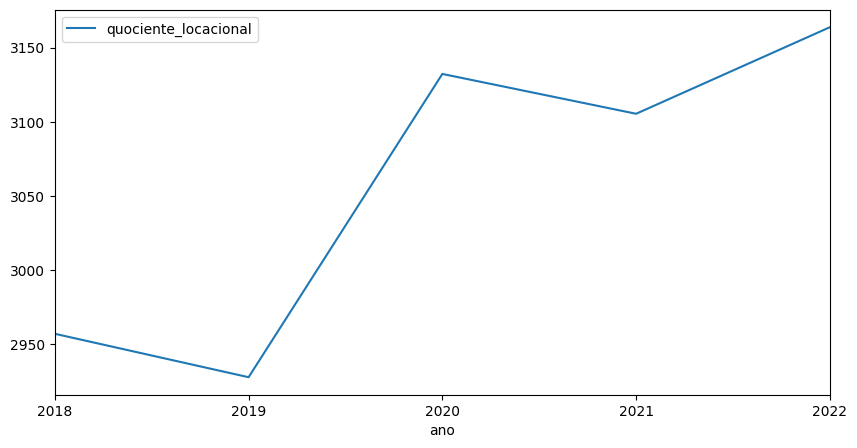

In [132]:
# plot
df_vc_jovens[['quociente_locacional']].plot(figsize=(10, 5));

In [133]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima.arima import auto_arima

In [134]:
data = df_vc_jovens

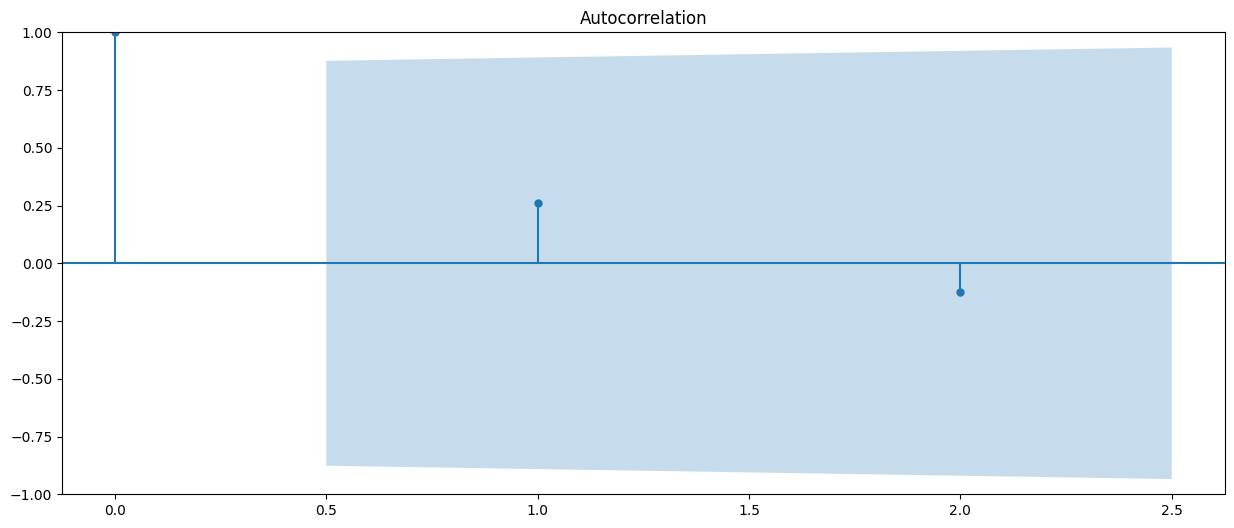

In [135]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

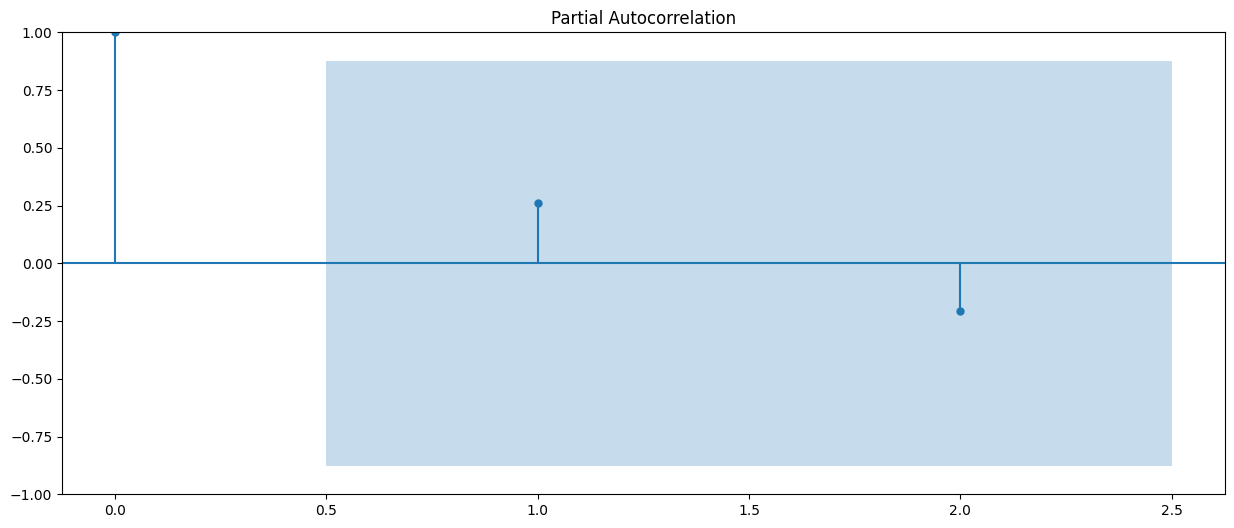

In [136]:
plot_pacf(data, method='ywm')
plt.show()

In [145]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=0, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.935, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=51.799, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=50.835, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=53.799, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=53.799, Time=0.01 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=55.799, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=50.577, Time=0.02 sec


c:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

c:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning:

divide by zero encountered in reciprocal

c:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

c:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning:

divide by zero encountered in reciprocal



 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=52.517, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[12] intercept
Total fit time: 0.966 seconds


In [101]:
print(stepwise_model.aic())

50.57709389882447


In [102]:
train = data.loc['2018-01-01':'2021-01-01']
test = data.loc['2022-01-01':]

In [103]:
train

,quociente_locacional
ano,
2018-01-01,2956.769100
2019-01-01,2927.430984
2020-01-01,3132.278630
2021-01-01,3105.377943


In [104]:
test

,quociente_locacional
ano,
2022-01-01,3163.835916


In [105]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [106]:
future_forecast = stepwise_model.predict(n_periods=12)

In [107]:
future_forecast

2022-01-01    3307.813528
2023-01-01    3283.299797
2024-01-01    3483.373271
2025-01-01    3461.197066
2026-01-01    3658.957342
2027-01-01    3639.070259
2028-01-01    3834.565239
2029-01-01    3816.919874
2030-01-01    4010.196468
2031-01-01    3994.746400
2032-01-01    4185.850546
2033-01-01    4172.550315
Freq: YS-JAN, dtype: float64

In [108]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=["quociente_locacional"])

c:\Python\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
c:\Python\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


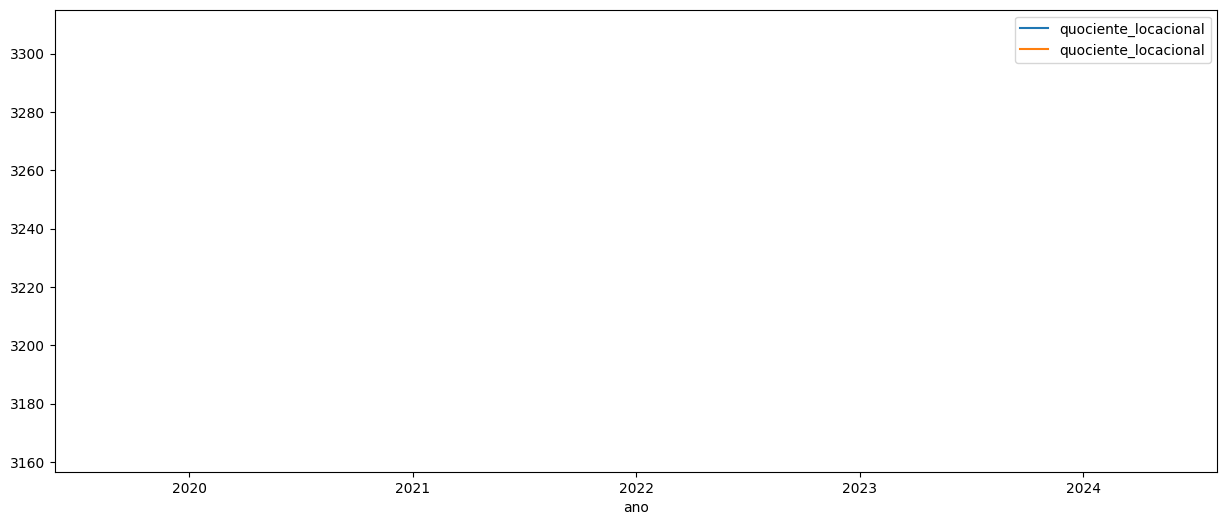

In [109]:
pd.concat([test,future_forecast],axis=1).plot()
plt.show()

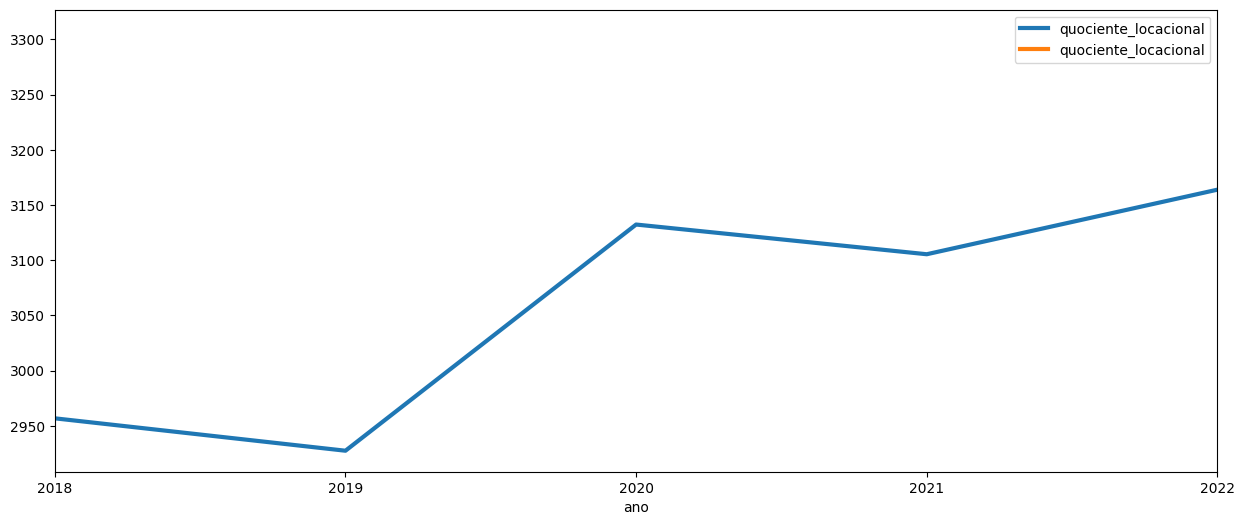

In [95]:
pd.concat([data,future_forecast],axis=1).plot(linewidth=3)
plt.show()